# Principal Component Analysis -- Pima Indians Diabetes

In [1]:
# load
df = catalog.load("pima_imputed")
df.head(5)

[06/03/25 06:38:49] INFO     Loading data from pima_imputed (CSVDataset)...                     ]8;id=712436;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=749845;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/io/data_catalog.py#403\403]8;;\

,pregnant,glucose,blood_pr,skin_thi,insulin,bmi,dbts_pdgr,age,flag_imp,outcome
0,6.0,148.0,72.0,35.000000,127.477659,33.6,0.627000,50.0,True,1.0
1,1.0,85.0,66.0,29.000000,120.094622,26.6,0.351000,31.0,True,0.0
2,8.0,183.0,64.0,16.168751,298.445158,23.3,0.672000,32.0,True,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,False,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,0.739128,33.0,True,1.0


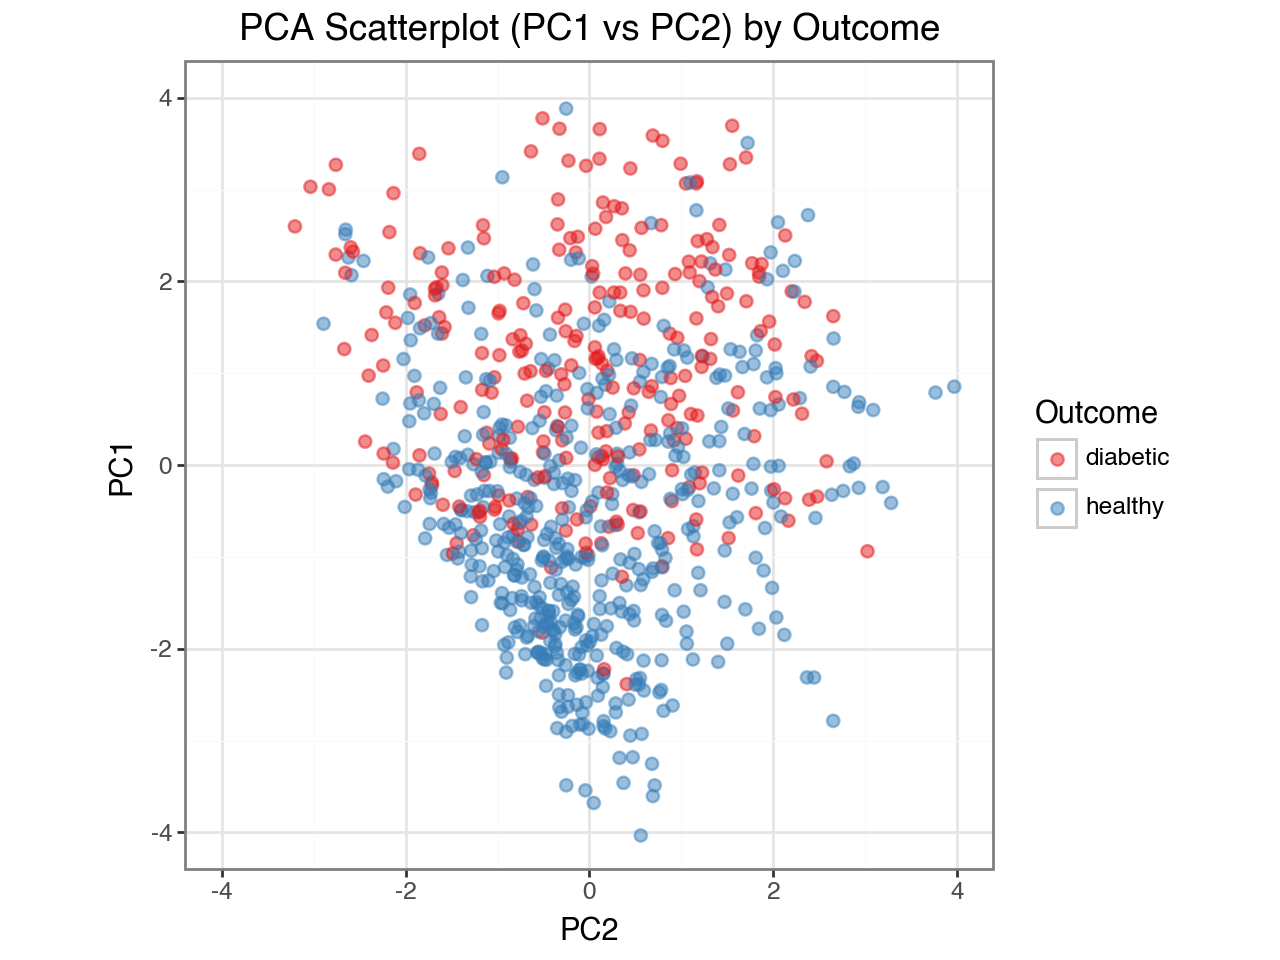

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from plotnine import (
    ggplot, aes, geom_point, scale_color_brewer, coord_fixed,
    labs, theme_bw
)

# 1) Ensure df is defined:
#    df = catalog.load("pima_imputed")

# 2) Select feature columns (exclude 'outcome' and 'flag_imp')
features = df.drop(columns=["outcome", "flag_imp"]).columns

# 3) Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 4) Apply PCA (2 components)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# 5) Build a DataFrame for plotting, with reversed labels
pca_df = pd.DataFrame({
    "pca_one": components[:, 0],
    "pca_two": components[:, 1],
    "outcome_label": df["outcome"]
        .map({0: "healthy", 1: "diabetic"})
        .astype("category")
})

# 6) Create a plotnine scatterplot with labeled categories
(
    ggplot(pca_df, aes(x="pca_two", y="pca_one", color="outcome_label"))
    + geom_point(size=2, alpha=0.5)
    + scale_color_brewer(type="qual", palette="Set1")
    + coord_fixed(ratio=1, xlim=(-4, 4), ylim=(-4, 4))
    + theme_bw()
    + labs(
        x="PC2",
        y="PC1",
        color="Outcome",
        title="PCA Scatterplot (PC1 vs PC2) by Outcome"
    )
)


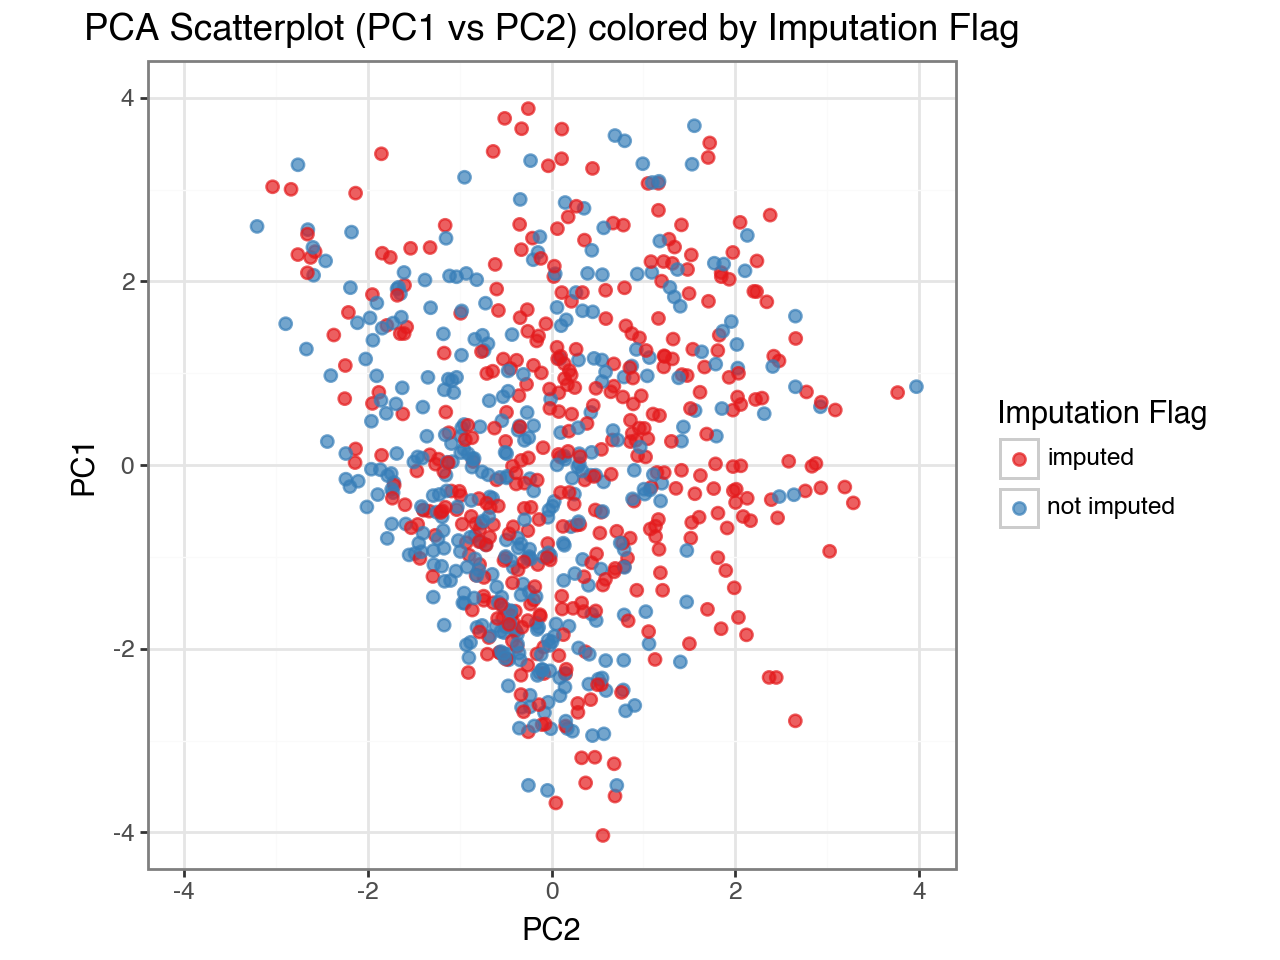

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from plotnine import (
    ggplot, aes, geom_point, scale_color_brewer, coord_fixed,
    labs, theme_bw
)

# 1) Ensure df is defined:
#    df = catalog.load("pima_imputed")

# 2) Select feature columns (exclude 'outcome' and 'flag_imp')
features = df.drop(columns=["outcome", "flag_imp"]).columns

# 3) Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 4) Apply PCA (2 components)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# 5) Build a DataFrame for plotting, labeling by imputation flag
pca_df = pd.DataFrame({
    "pca_one": components[:, 0],
    "pca_two": components[:, 1],
    "flag_label": df["flag_imp"].map({False: "not imputed", True: "imputed"}).astype("category")
})

# 6) Create the plotnine scatterplot with limits [-4, 4] and square aspect,
#    colored by flag_imp using the same Set1 palette
(
    ggplot(pca_df, aes(x="pca_two", y="pca_one", color="flag_label"))
    + geom_point(size=2, alpha=0.7)
    + scale_color_brewer(type="qual", palette="Set1")
    + coord_fixed(ratio=1, xlim=(-4, 4), ylim=(-4, 4))
    + theme_bw()
    + labs(
        x="PC2",
        y="PC1",
        color="Imputation Flag",
        title="PCA Scatterplot (PC1 vs PC2) colored by Imputation Flag"
    )
)


In [23]:
df1 = catalog.load("pima_no_outliers")
df1.head(5)

[06/02/25 10:11:10] INFO     Loading data from pima_no_outliers (CSVDataset)...                 ]8;id=345022;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=855474;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/io/data_catalog.py#403\403]8;;\

,pregnant,glucose,blood_pr,skin_thi,insulin,bmi,dbts_pdgr,age,outcome,flag_imp
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0,0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0,1.0,1


In [25]:
df1["n_missing"] = df1.isna().sum(axis=1)
df1.head()

,pregnant,glucose,blood_pr,skin_thi,insulin,bmi,dbts_pdgr,age,outcome,flag_imp,n_missing
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0,0,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0,0,1
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0,0,2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0,1.0,1,1


In [36]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# 1) Identify numeric columns to impute
numeric_cols = ["pregnant", "glucose", "blood_pr", "skin_thi",
                "insulin", "bmi", "dbts_pdgr", "age"]

# 2) Replace pandas’ pd.NA with numpy’s np.nan for consistency
df1[numeric_cols] = df1[numeric_cols].replace({pd.NA: np.nan})

# 3) Convert those columns to float dtype
df1[numeric_cols] = df1[numeric_cols].astype(float)

# 4) Set up the IterativeImputer (MICE)
mice_imputer = IterativeImputer(random_state=42)

# 5) Impute missing values in df1 using MICE
df1[numeric_cols] = mice_imputer.fit_transform(df1[numeric_cols])

# 6) Check the resulting DataFrame
df1.head(5)


,pregnant,glucose,blood_pr,skin_thi,insulin,bmi,dbts_pdgr,age,outcome,flag_imp,n_missing
0,6.0,148.0,72.0,35.0,122.0,33.6,0.627,50.0,1.0,0,1
1,1.0,85.0,66.0,29.0,122.0,26.6,0.351,31.0,0.0,0,1
2,8.0,183.0,64.0,29.0,122.0,23.3,0.672,32.0,1.0,0,2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,0.366,33.0,1.0,1,1


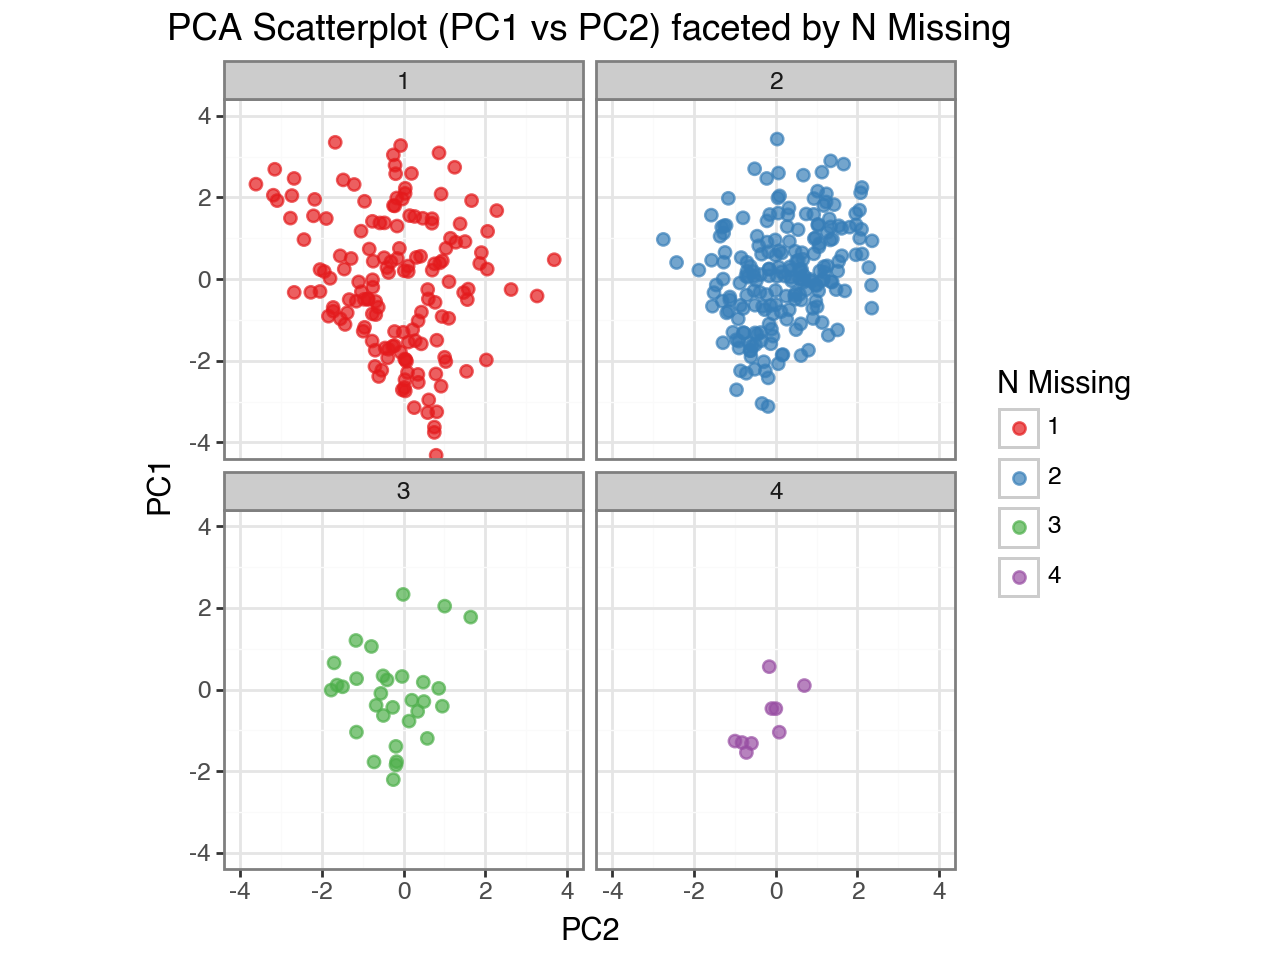

In [37]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from plotnine import (
    ggplot, aes, geom_point, scale_color_brewer, coord_fixed,
    facet_wrap, labs, theme_bw
)

# 1) Assume df1 is already defined (with n_missing and imputed numeric columns)

# 2) Filter to only rows where n_missing > 0
df1_filtered = df1[df1["n_missing"] > 0].copy()

# 3) Select feature columns (exclude 'outcome', 'flag_imp', 'n_missing')
features = [
    "pregnant", "glucose", "blood_pr", "skin_thi",
    "insulin", "bmi", "dbts_pdgr", "age"
]

# 4) Standardize those features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1_filtered[features])

# 5) Compute PCA (2 components)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# 6) Build a DataFrame for plotting
pca_df = pd.DataFrame({
    "pca_one":  components[:, 0],
    "pca_two":  components[:, 1],
    # Keep n_missing as a categorical so each facet is one level
    "n_missing": df1_filtered["n_missing"].astype(int).astype("category")
})

# 7) Create the Plotnine scatterplot, faceted by n_missing
(
    ggplot(pca_df, aes(x="pca_two", y="pca_one", color="n_missing"))
    + geom_point(size=2, alpha=0.7)
    + scale_color_brewer(type="qual", palette="Set1")
    + facet_wrap("~n_missing")
    + coord_fixed(ratio=1, xlim=(-4, 4), ylim=(-4, 4))
    + theme_bw()
    + labs(
        x     = "PC2",
        y     = "PC1",
        color = "N Missing",
        title = "PCA Scatterplot (PC1 vs PC2) faceted by N Missing"
    )
)
